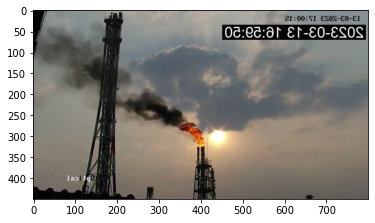

In [1]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('V:/data_annotation/train_valid_test_data/train/augmentation/fliplr/images/fliplr_pico_000020.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

174 40
(174, 40) (184, 50)


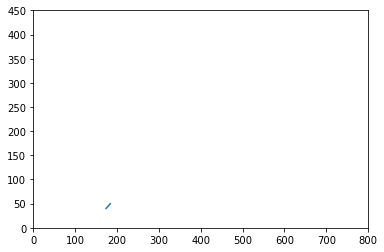

In [45]:
imshape = image.shape
import numpy as np
slant = 10
drop_length=10
for i in range(1):
    if slant<0:            
        x= np.random.randint(slant,imshape[1])        
    else:            
        x= np.random.randint(0,imshape[1]-slant)        
        y= np.random.randint(0,imshape[0]-drop_length)
    pt1=(x,y)
    pt2=(x+slant,y+drop_length)
    print(x,y)
    print(pt1,pt2)
    plt.xlim([0, imshape[1]])
    plt.ylim([0, imshape[0]])
    # plt.plot(pt1, pt2)
    plt.plot((pt1[0],pt2[0]),(pt1[1],pt2[1]))
plt.show()

In [67]:
import cv2
import numpy as np
def generate_random_lines(imshape,slant,drop_length):
    drops=[]    
    for i in range(1000): ## If You want heavy rain, try increasing this        
        if slant<0:            
            x= np.random.randint(slant,imshape[1])        
        else:            
            x= np.random.randint(0,imshape[1]-slant)        
            y= np.random.randint(0,imshape[0]-drop_length)        
            drops.append((x,y))    
    return drops            
def add_rain(image):        
    imshape = image.shape    
    slant_extreme=10 # default 10
    slant= np.random.randint(-slant_extreme,slant_extreme)     
    drop_length=10 # default 20
    drop_width=1 # default 2
    drop_color=(200,200,200) ## a shade of gray    
    print(imshape, slant, drop_length)

    rain_drops= generate_random_lines(imshape,slant,drop_length)        
    for rain_drop in rain_drops:        
        cv2.line(img=image,pt1=(rain_drop[0],rain_drop[1]),pt2=(rain_drop[0]+slant,rain_drop[1]+drop_length),color=drop_color,thickness=drop_width)    
        # image= cv2.blur(image,(2,2)) ## rainy view are blurry        
        brightness_coefficient = 0.9 ## rainy days are usually shady    defalut 0.7 
        image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS    
        image_HLS[:,:,1] = image_HLS[:,:,1]*brightness_coefficient ## scale pixel values down for channel 1(Lightness)    
        image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) ## Conversion to RGB    
    return image_RGB

(450, 800, 3) 7 10


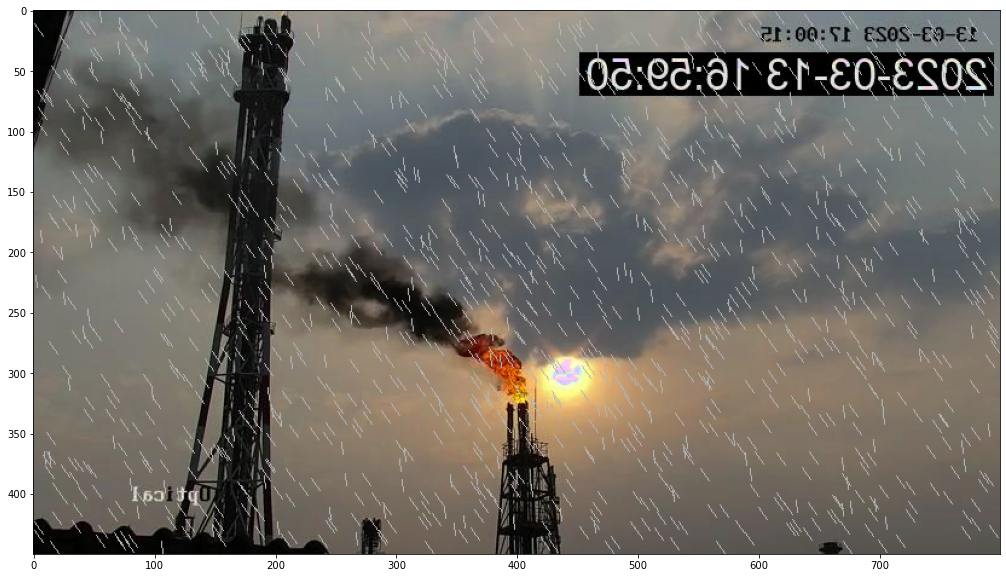

In [68]:
rain_img = add_rain(image)
plt.figure(figsize=(30,10))
plt.imshow(rain_img)

In [65]:
slant_extreme = 10
np.random.randint(-slant_extreme,slant_extreme)  

-10

In [15]:
import numpy as np
imshape = image.shape    
slant_extreme=10    
slant= np.random.randint(-slant_extreme,slant_extreme)     
drop_length=20    
drop_width=2    
drop_color=(200,200,200) ## a shade of gray    
print(imshape, slant, drop_length)

drops=[]    
for i in range(150): ## If You want heavy rain, try increasing this        
    if slant<0:            
        x= np.random.randint(slant,imshape[1])        
    else:            
        x= np.random.randint(0,imshape[1]-slant)        
        y= np.random.randint(0,imshape[0]-drop_length)        
        drops.append((x,y)) 

(450, 800, 3) -2 20


In [4]:
drops

[(12, 360),
 (714, 184),
 (551, 385),
 (212, 405),
 (787, 302),
 (738, 324),
 (335, 409),
 (410, 153),
 (509, 389),
 (485, 107),
 (787, 256),
 (737, 331),
 (555, 302),
 (762, 160),
 (284, 131),
 (504, 58),
 (693, 311),
 (176, 354),
 (649, 38),
 (527, 15),
 (757, 206),
 (325, 259),
 (6, 158),
 (146, 127),
 (665, 253),
 (752, 1),
 (253, 57),
 (536, 253),
 (683, 87),
 (413, 217),
 (17, 163),
 (52, 260),
 (484, 242),
 (408, 61),
 (670, 309),
 (288, 401),
 (7, 136),
 (5, 215),
 (304, 407),
 (9, 275),
 (21, 264),
 (31, 135),
 (239, 50),
 (476, 266),
 (673, 133),
 (624, 386),
 (191, 302),
 (752, 380),
 (63, 217),
 (492, 223),
 (200, 21),
 (361, 182),
 (143, 165),
 (649, 395),
 (644, 143),
 (741, 86),
 (70, 196),
 (499, 369),
 (269, 105),
 (468, 291),
 (520, 86),
 (609, 21),
 (442, 212),
 (82, 328),
 (437, 186),
 (300, 404),
 (680, 191),
 (11, 197),
 (169, 58),
 (516, 372),
 (445, 369),
 (683, 151),
 (373, 261),
 (778, 405),
 (748, 251),
 (449, 29),
 (626, 204),
 (717, 41),
 (155, 90),
 (550, 

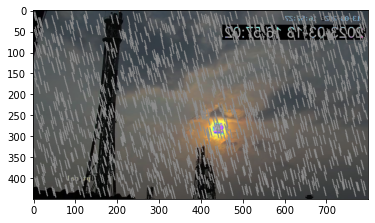

In [16]:
for rain_drop in drops:        
    cv2.line(image,(rain_drop[0],rain_drop[1]),(rain_drop[0]+slant,rain_drop[1]+drop_length),drop_color,drop_width)    
    # image= cv2.blur(image,(1,1)) ## rainy view are blurry        
    brightness_coefficient = 0.7 ## rainy days are usually shady     
    image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS    
    image_HLS[:,:,1] = image_HLS[:,:,1]*brightness_coefficient ## scale pixel values down for channel 1(Lightness)    
    image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) ## Conversion to RGB    
plt.imshow(image_RGB)
plt.show()

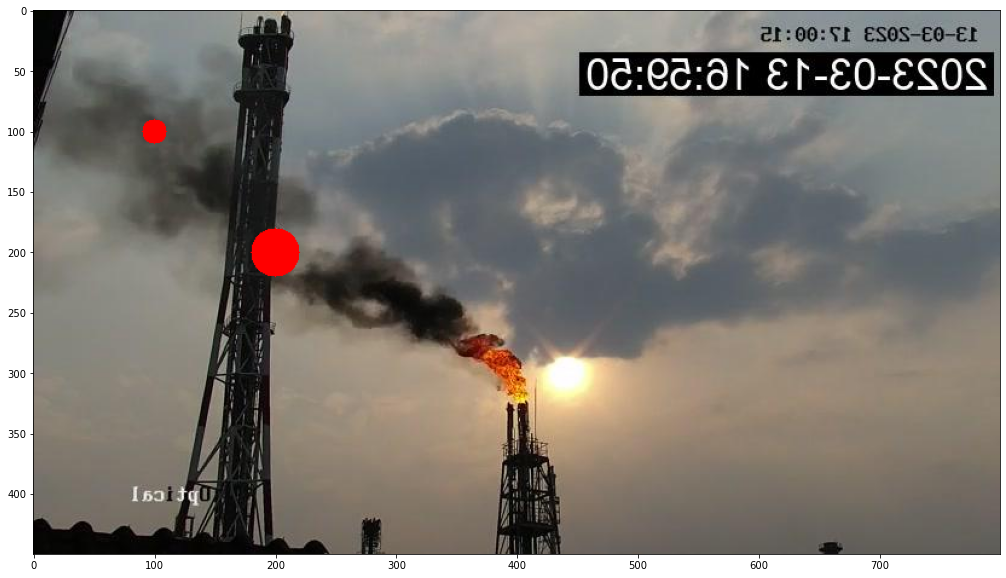

In [86]:
import cv2
import numpy as np

def add_rain_effect(image, rain_drops):
  """Adds a rain effect to an image.

  Args:
    image: The image to add the rain effect to.
    rain_drops: A list of rain drops, each of which is a tuple of (x, y, radius).

  Returns:
    The image with the rain effect added.
  """

  image_height, image_width, _ = image.shape
  for x, y, radius in rain_drops:
    cv2.circle(image, (x, y), radius, (0, 0, 255), -1)

  return image

if __name__ == "__main__":
  src = 'V:/data_annotation/train_valid_test_data/train/augmentation/fliplr/images/fliplr_pico_000020.jpg'
  image = cv2.imread(src)
  rain_drops = [(100, 100, 10), (200, 200, 20)]

  image = add_rain_effect(image, rain_drops)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,10))
plt.imshow(image)
#   cv2.imshow("Image with rain effect", image)
#   cv2.waitKey(0)
